# [Data mining #2](https://www.codewars.com/kata/591748b3f014a2593d0000d9)

Your task is to build a $model^{1}$ which can predict y-coordinate.
You can pass tests if predicted y-coordinates are inside error margin.


You will receive train set which should be used to build a model.
After you build a model tests will call function `predict` and pass x to it.


Error is going to be calculated with [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/).

Side note: Points in test cases are from different polynomials (up to 5th degree).

Easier version: [Data mining #1](https://www.codewars.com/kata/data-mining-number-1)

Blocked libraries: *sklearn, pandas, tensorflow, numpy, scipy*

#### Explanation
[1] *A mining model is created by applying an algorithm to data, but it is more than an algorithm or a metadata container: it is a set of data, statistics, and patterns that can be applied to new data to generate predictions and make inferences about relationships.*

In [1]:
def rmse(predicted_y, test_y):
    return (sum([(predicted_y[i]-test_y[i])**2 for i in range(len(test_y))])/len(test_y))**0.5

class Datamining:

    def __init__(self, train_set, lr = 0.01):
        self.train_set = train_set
        
        X = [point[0] for point in self.train_set]
        Y = [point[1] for point in self.train_set]
        
        x_m = sum(X)/len(X)
        y_m = sum(Y)/len(Y)
        cov = sum([(x-x_m)*(y-y_m) for x, y in train_set])/(len(train_set)-1)
        var_x = sum([(x-x_m)**2 for x in X])/(len(X)-1)
        self.a = cov / var_x
        self.b = y_m - self.a * x_m

    def predict(self, x_test):
        return x_test*self.a+self.b

In [210]:
import seaborn as sns
# sns.get_dataset_names()
df = sns.load_dataset("taxis")

example_train_set = list(zip(df.total, df.distance))

In [211]:
dm = Datamining(example_train_set)

pred = [dm.predict(point[0]) for point in example_train_set]
X = [point[0] for point in example_train_set]
Y = [point[1] for point in example_train_set]

RMSE: 1.6309245064991222


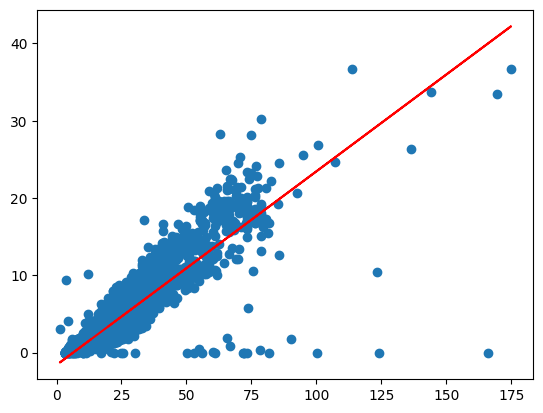

In [212]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'o')
plt.plot(X, pred, color='r');
print(f'RMSE: {rmse(Y, pred)}') # 1.6634959274132406

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

RMSE: 1.3830163559933562


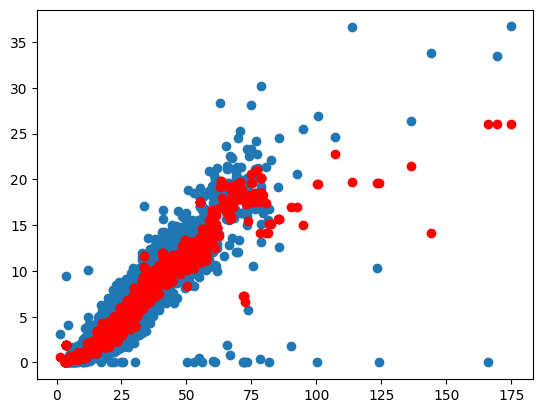

In [6]:
knn = KNeighborsRegressor().fit(np.array(X).reshape(-1, 1), Y)
pred = knn.predict(np.array(X).reshape(-1, 1))

plt.plot(X, Y, 'o')
plt.plot(X, pred, 'o', color='r');
print(f'RMSE: {rmse(Y, pred)}') # 1.6634959274132406

In [47]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [168]:
sns.load_dataset("mpg").head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [169]:
import seaborn as sns
# sns.get_dataset_names()
df = sns.load_dataset("mpg")
print(df.shape)
train_set = list(zip(df.displacement, df.acceleration))

(398, 9)


In [170]:
def rmse(predicted_y, test_y):
    return (sum([(predicted_y[i]-test_y[i])**2 for i in range(len(test_y))])/len(test_y))**0.5

def sort_arg(arr):
    li = sorted([[arr[i],i] for i in range(len(arr))])
    return [x[1] for x in li]

def dist(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

class Datamining:

    def __init__(self, train_set):
        self.train_set = train_set
        
        X = [point[0] for point in self.train_set]
        Y = [point[1] for point in self.train_set]
        x_m = sum(X)/len(X)
        y_m = sum(Y)/len(Y)
        cov = sum([(x-x_m)*(y-y_m) for x, y in train_set])/(len(train_set)-1)
        var_x = sum([(x-x_m)**2 for x in X])/(len(X)-1)
        self.a = cov / var_x
        self.b = y_m - self.a * x_m

    def predict_knn(self, test_x, k = 2):
        # indexes_l = sort_arg([abs(i - test_x) for i, _ in self.train_set])[:5+k]
        indexes_l = sort_arg([abs(i - test_x) for i, _ in self.train_set])[:k]
        neighbors_l = [self.train_set[i] for i in indexes_l]
        # n = (test_x, sum(i for _, i in neighbors_l)/len(neighbors_l))
        # dists = sort_arg([dist(n, i) for i in neighbors_l])[:k]
        # neighbors = [neighbors_l[i] for i in dists]
        knn = sum(i for _, i in neighbors_l)/len(neighbors_l)
        # return sum(i for _, i in neighbors)/len(neighbors)
        return knn
    
    def predict_lr(self, test_x):
        lr = test_x*self.a+self.b
        return lr
    
    def predict(self, test_x, k = 2):
        return (self.predict_knn(test_x, k) + self.predict_lr(test_x))/2

RMSE: 2.0293894987293126


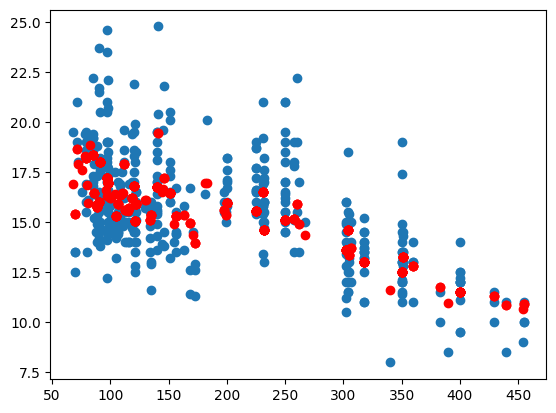

In [171]:
dm = Datamining(train_set)

pred = [dm.predict(point[0], k = 2) for point in train_set]
X = [point[0] for point in train_set]
Y = [point[1] for point in train_set]

import matplotlib.pyplot as plt
plt.plot(X, Y, 'o')
plt.plot(X, pred, 'o', color='r');
print(f'RMSE: {rmse(Y, pred)}') # 0.18400724623412704